<a href="https://colab.research.google.com/github/Chandanr77/Machine-learning/blob/main/Regression_on_Boston_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_boston

boston = load_boston()

In [2]:
type(boston)

sklearn.utils.Bunch

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
import pandas as pd

In [5]:
boston_df = pd.DataFrame(boston.data, columns =boston.feature_names)

In [6]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
boston_df['MEDV'] = boston.target

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
X = boston.data
y = boston.target
print(X.shape)

(506, 13)


In [12]:
X = boston_df.drop('MEDV' , axis=1)
y = boston_df['MEDV']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2 , random_state = 1)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [16]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()

In [17]:
model_lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
print("The intercept for the LR model is : " ,model_lr.intercept_)

The intercept for the LR model is :  42.93352585337762


In [19]:
print("The regression co-efficient values for all the features are : " , model_lr.coef_)

The regression co-efficient values for all the features are :  [-1.12386867e-01  5.80587074e-02  1.83593559e-02  2.12997760e+00
 -1.95811012e+01  3.09546166e+00  4.45265228e-03 -1.50047624e+00
  3.05358969e-01 -1.11230879e-02 -9.89007562e-01  7.32130017e-03
 -5.44644997e-01]


In [20]:
y_pred_test = model_lr.predict(X_test)

In [21]:
pd.DataFrame({'Actual y_test': y_test , 'Predicted y_test' : y_pred_test})

,Actual y_test,Predicted y_test
307,28.2,32.655032
343,23.9,28.093495
47,16.6,18.029018
67,22.0,21.476716
362,20.8,18.825439
...,...,...
92,22.9,29.089918
224,44.8,37.119379
110,21.7,20.532710
426,10.2,17.368400


In [22]:
from sklearn.metrics import mean_squared_error

import numpy as np

print ('RMSE value of testing dataset')

print(np.sqrt(mean_squared_error(y_test,y_pred_test)))

RMSE value of testing dataset
4.835373458200559


In [23]:
print("R2 score is : {}".format(model_lr.score(X_test,y_test)))

R2 score is : 0.7634174432138451


In [24]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [25]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [26]:
correlated_cols =['INDUS','RAD','DIS']

boston_df_new = boston_df.drop(correlated_cols, axis =1 )

print(boston_df.shape)
print(boston_df_new.shape)

(506, 14)
(506, 11)


In [27]:
X_new = boston_df_new.drop('MEDV', axis=1)
y_new = boston_df_new['MEDV']

print(X_new.shape)

(506, 10)


In [28]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 1)

In [29]:
print(X_train.shape)
print(y_train.shape)

print('-------------------')
print(X_test.shape)
print(y_test.shape)

(404, 10)
(404,)
-------------------
(102, 10)
(102,)


In [30]:
from sklearn.linear_model import LinearRegression

model_lr_new = LinearRegression(fit_intercept = False)

In [31]:
model_lr_new.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [32]:
y_pred_new = model_lr_new.predict(X_test)

In [33]:
from sklearn.metrics import mean_squared_error
import numpy as np

print('RMSE value of testing dataset is:')

print(np.sqrt(mean_squared_error(y_test, y_pred_new)))

RMSE value of testing dataset is:
4.982595223246539


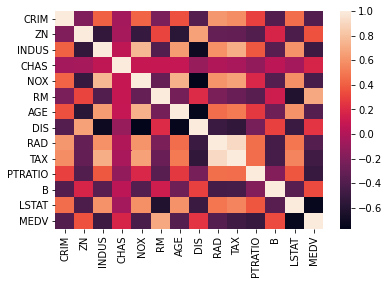

In [34]:
import seaborn as sns

sns.heatmap(boston_df.corr())

In [35]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 2, fit_intercept = False)

In [36]:
ridge_reg.fit(X_train,y_train)
y_test_pred = ridge_reg.predict(X_test)

In [37]:
print('RMSE value of testing dataset is:')

print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

RMSE value of testing dataset is:
4.996430259192182


In [38]:
y_train_pred = ridge_reg.predict(X_train)


In [39]:
print('RMSE value of training dataset is:')

print(np.sqrt(mean_squared_error(y_train, y_train_pred)))

RMSE value of training dataset is:
5.130207225963721


In [40]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.02)

In [41]:
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.02, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [42]:
y_test_pred = lasso_reg.predict(X_test)

In [43]:
print('RMSE value of testing dataset is:')

print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

RMSE value of testing dataset is:
5.258605010918269


In [44]:
from sklearn.linear_model import ElasticNet
elastic_reg = ElasticNet(alpha = 0.03)

In [45]:
elastic_reg.fit(X_train,y_train)

ElasticNet(alpha=0.03, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [46]:
y_test_pred = elastic_reg.predict(X_test)

In [47]:
print('RMSE value of testing dataset is:')

print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

RMSE value of testing dataset is:
5.293131962828955
